In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(color_codes=True)
matplotlib.style.use('ggplot')

In [10]:
## Read Data ##
df = pd.DataFrame.from_csv('celebrity_deaths_2016_enriched.csv')

In [11]:
### Groupby Queries ####
groupby_death_year = df.groupby(['death_year'])
groupby_age = df.groupby(['age'])
groupby_death_birth = df.groupby(['death_year', 'birth_year'])
groupby_death_month = df.groupby(['death_year', 'death_month'])
groupby_death_famescore = df.groupby(['death_year', 'famescore'])
groupby_age_famescore = df.groupby(['age', 'famescore'])
groupby_career = df.groupby(['career_type'])
groupby_career_death_year = df.groupby(['career_type', 'death_year'])

In [12]:
#########################
######## PLOTS ##########
#########################

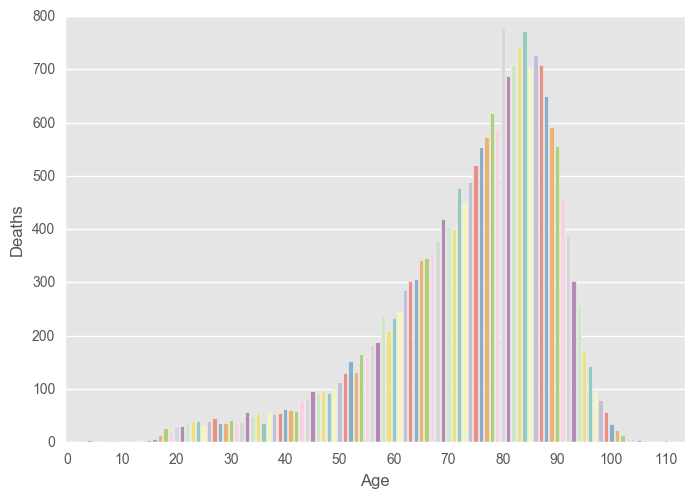

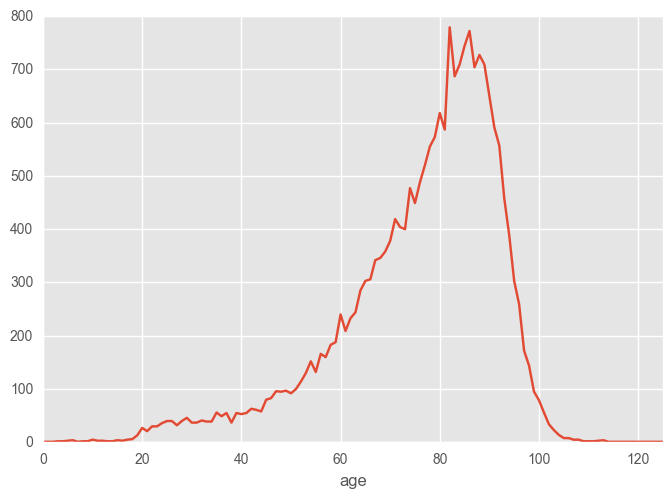

In [13]:
########### groupby_age ##########
age = groupby_age['age']
ages = []
for i in age:
    ages.append(i[0])
size = []
for i in groupby_age.size():
    size.append(i)    
sns.barplot(x=ages, y=size, palette="Set3")
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
ax.set(xlabel='Age', ylabel='Deaths')
plt.show()
## Normal pandas wrapper plot ###
groupby_age.size().plot()
##################################

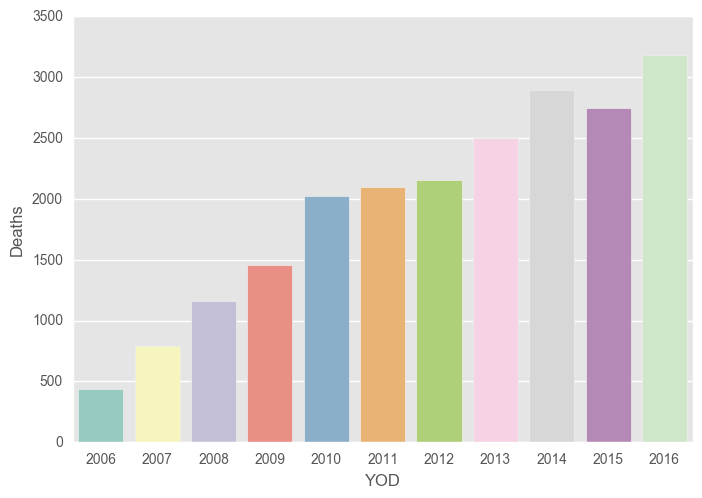

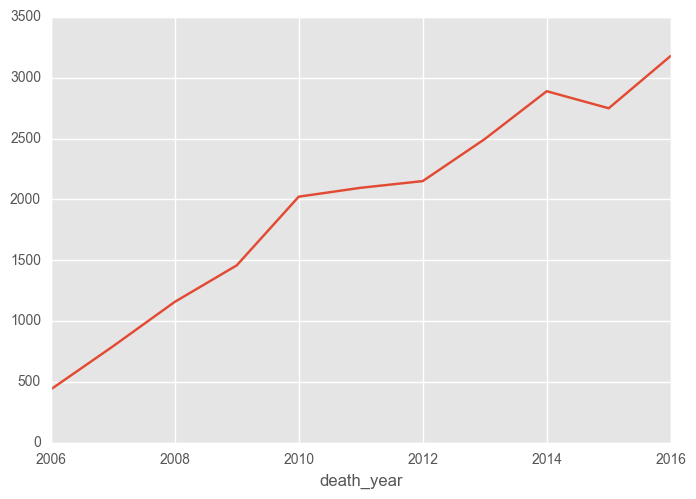

In [14]:
##### groupby death year ########
size = []
for i in groupby_death_year.size():
    size.append(i)
years = []
for i in groupby_death_year['death_year']:
    years.append(i[0])
sns.barplot(x=years, y=size, palette="Set3")
ax = plt.gca()
ax.set(xlabel='YOD', ylabel='Deaths')
plt.show()
## Normal pandas wrapper plot ###
groupby_death_year.size().plot()
#################################

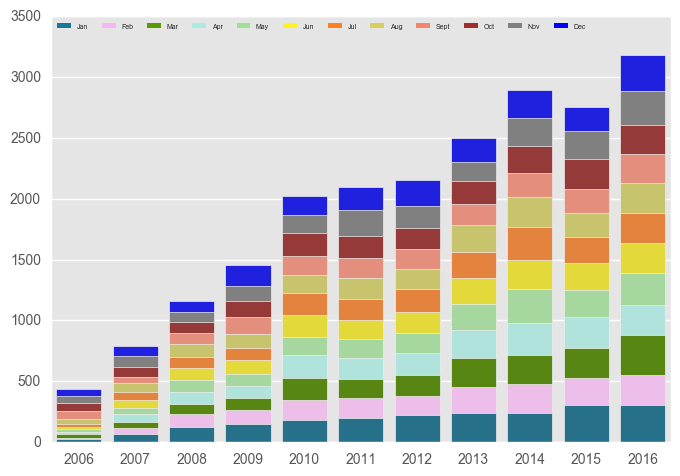

In [15]:
##### Death Year and Death Month ###########
############################################
######## 1 series for each month ###########

jan, feb, mar, apr, may, jun, jul, aug, sep, octt, nov, dec = ([] for i in range(12))
years = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

# Consturct deaths by month
month = groupby_death_month['death_month']
for i in month:
    yr = i[0][0]
    mth = i[0][1]
    d = len(i[1])
    
    if mth == 'April':
        apr.append(d)
    elif mth == 'August':
        aug.append(d)
    elif mth == 'December':
        dec.append(d)
    elif mth == 'February':
        feb.append(d)
    elif mth == 'January':
        jan.append(d)
    elif mth == 'July':
        jul.append(d)
    elif mth == 'June':
        jun.append(d)
    elif mth == 'March':
        mar.append(d)
    elif mth == 'May':
        may.append(d)
    elif mth == 'November':
        nov.append(d)
    elif mth == 'October':
        octt.append(d)
    elif mth == 'September':
        sep.append(d)
        
dec = [sum(n) for n in zip(*[apr, aug, dec, feb, jan, jul, jun, mar, may, nov, octt, sep])]
nov = [sum(n) for n in zip(*[apr, aug, feb, jan, jul, jun, mar, may, nov, octt, sep])]
octt = [sum(n) for n in zip(*[apr, aug, feb, jan, jul, jun, mar, may, octt, sep])]
sep = [sum(n) for n in zip(*[apr, aug, feb, jan, jul, jun, mar, may, sep])]
aug = [sum(n) for n in zip(*[apr, aug, feb, jan, jul, jun, mar, may])]
jul = [sum(n) for n in zip(*[apr, feb, jan, jul, jun, mar, may])]
jun = [sum(n) for n in zip(*[apr, feb, jan, jun, mar, may])]
may = [sum(n) for n in zip(*[apr, feb, jan, mar, may])]
apr = [sum(n) for n in zip(*[apr, feb, jan, mar])]
mar = [sum(n) for n in zip(*[feb, jan, mar])]
feb = [sum(n) for n in zip(*[feb, jan])]

# Plot in order
sns.barplot(x=years, y=dec, color="blue",label='Dec')
sns.barplot(x=years, y=nov, color="grey",label='Nov')
sns.barplot(x=years, y=octt, color='brown',label='Oct')
sns.barplot(x=years, y=sep, color="#F5846C",label='Sept')
sns.barplot(x=years, y=aug, color="#D7D05E",label='Aug')
sns.barplot(x=years, y=jul, color="#FF7F21",label='Jul')
sns.barplot(x=years, y=jun, color='#FFF21F',label='Jun')
sns.barplot(x=years, y=may, color="#9EE094",label='May')
sns.barplot(x=years, y=apr, color="#A7ECE1",label='Apr')
sns.barplot(x=years, y=mar, color="#5C9900",label='Mar')
sns.barplot(x=years, y=feb, color="#F6B6F1",label='Feb')
sns.barplot(x=years, y=jan, color="#157899",label='Jan')

#Legend
Ja = plt.Rectangle((0,0),1,1,fc="#157899", edgecolor = 'none')
Fe = plt.Rectangle((0,0),1,1,fc='#F6B6F1', edgecolor = 'none')
Mr = plt.Rectangle((0,0),1,1,fc='#5C9900', edgecolor = 'none')
Ap = plt.Rectangle((0,0),1,1,fc='#A7ECE1', edgecolor = 'none')
My = plt.Rectangle((0,0),1,1,fc='#9EE094', edgecolor = 'none')
Ju = plt.Rectangle((0,0),1,1,fc='#FFF21F', edgecolor = 'none')
Jy = plt.Rectangle((0,0),1,1,fc='#FF7F21', edgecolor = 'none')
Au = plt.Rectangle((0,0),1,1,fc='#D7D05E', edgecolor = 'none')
Se = plt.Rectangle((0,0),1,1,fc='#F5846C', edgecolor = 'none')
Oc = plt.Rectangle((0,0),1,1,fc='brown', edgecolor = 'none')
Nv = plt.Rectangle((0,0),1,1,fc='grey', edgecolor = 'none')
Dc = plt.Rectangle((0,0),1,1,fc='blue', edgecolor = 'none')

l = plt.legend([Ja,Fe,Mr,Ap,My,Ju,Jy,Au,Se,Oc,Nv,Dc], 
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
    loc=2, ncol = 12, 
    prop={'size':5}
)


['athlete', 'NAN', 'politician', 'religious', 'actor', 'writer', 'musician', 'actress', 'radio~television', 'director', 'artist', 'businessman', 'producer', 'coach', 'educator', 'cinematographer', 'lawyer', 'designer', 'engineer', 'pilot', 'military', 'activist', 'historian', 'scientist', 'laureate', 'photographer', 'model', 'critic', 'dancer', 'criminal', 'agent', 'magician']
[4960, 4678, 3050, 1511, 1353, 1223, 1170, 800, 470, 401, 301, 188, 171, 163, 133, 95, 93, 85, 83, 76, 75, 61, 60, 50, 41, 37, 28, 24, 23, 15, 13, 3]


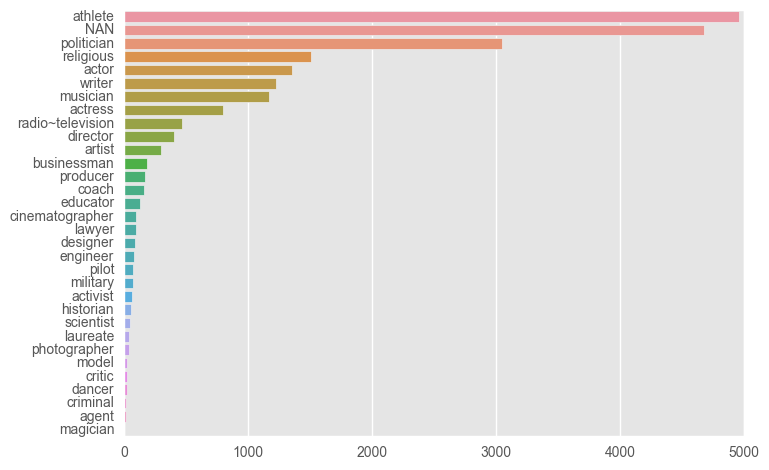

In [30]:
## Visualization of Career_type ##

career_dy = groupby_career_death_year.size()
career_gr = groupby_career.size()
deaths_by_career = []
careers = []

for i in groupby_career['career_type']:
    careers.append(i[0])
idx = 0
for i in career_gr:
    deaths_by_career.append((i,careers[idx]))
    idx += 1

deaths_by_career.sort(key=lambda x: x[0], reverse=True)

career = []
count = []
for i in deaths_by_career:
    
    career.append(i[1])
    count.append(i[0])

sns.set_color_codes("pastel")
sns.barplot(y=career, x=count)

